In [45]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

from run_utils import run_env_experiment, plot_ratings_mses

sys.path.append('../') 
from reclab.environments.latent_factors import DatasetLatentFactor, LatentFactorBehavior

from reclab.recommenders import LibFM
from reclab.recommenders import KNNRecommender
from reclab.recommenders import TopPop



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration with Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate how epsilon-greedy exploration strategies compare for static and dynamin user models.

In [46]:
## Key Parameters across all settings
expdirname = 'dynamic_user_static_rec'

topics = True

num_users = 500
num_items = 170 * 2

env_params = {
    'num_users': num_users,
    'num_items': num_items,
    'rating_frequency': 0.5,
    'num_init_ratings': 500
}

exp_params = {
    'n_trials': 1,
    'len_trial': 100,
    'SEED': 24532,
}
num_init_ratings = 1000

In [ ]:

recommenders = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01,
        strategy='greedy'
    ),
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01,
        strategy='eps_greedy'
    ),
#     KNNRecommender(
#         user_based=False,
#         strategy='greedy'
#     ),
#     KNNRecommender(
#         user_based=False,
#         strategy='eps_greedy'
#     ),
] 

## Static User Behavior

Here, the user model does not change over time. 

In [47]:
params = {'latent_dim': 8}
env_params_dataset = {key:env_params[key] for key in env_params.keys() if key not in ['num_users', 'num_items']}
for key in ['num_users', 'num_items']:
    env_params_dataset['max_'+key] = env_params[key]
env = DatasetLatentFactor('ml-100k', **params, **env_params_dataset)

datafilename = 'static_2'+env.name+'.npz'


ratings, preds = run_env_experiment([env], recommenders, exp_params['n_trials'], exp_params['len_trial'], 
                                    expdirname, datafilename, overwrite=True)

Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.
Saving to data/dynamic_user_static_rec/static_2latent-ml-100k.npz


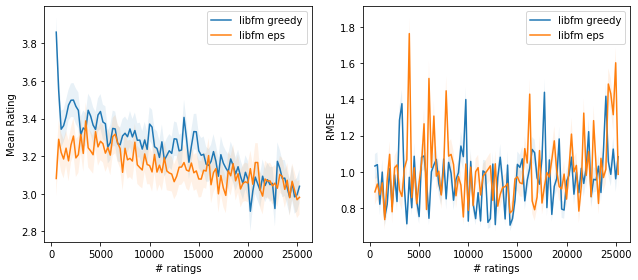

In [48]:
plot_ratings_mses(ratings[0], preds[0], env_params['num_init_ratings'], ['libfm greedy', 'libfm eps', 'itemKnn greedy', 'itemKnn eps'])

In [49]:
params = {'latent_dim': 8}

env = LatentFactorBehavior(**params, **env_params)

datafilename = 'static_2'+env.name+'.npz'

ratings, preds = run_env_experiment([env], recommenders, exp_params['n_trials'], exp_params['len_trial'], 
                                    expdirname, datafilename, overwrite=True)

Saving to data/dynamic_user_static_rec/static_2latent.npz


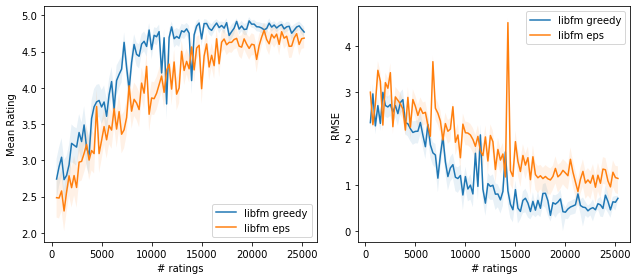

In [50]:
plot_ratings_mses(ratings[0], preds[0], env_params['num_init_ratings'], ['libfm greedy', 'libfm eps', 'itemKnn greedy', 'itemKnn eps'])

## Dynamic User Behavior

Users gradually become more interested in topics that they are exposed to, but also exhibit boredom when they see many similar items in a row.

In [51]:
params = {'latent_dim': 8, 'affinity_change': 0.1, 'memory_length': 5, 
          'boredom_threshold': 0.5, 'boredom_penalty': 1.0}
env = DatasetLatentFactor('ml-100k', **params, **env_params_dataset)

datafilename = 'boredom_and_interest_'+env.name+'.npz'
ratings, preds = run_env_experiment([env], recommenders, exp_params['n_trials'], exp_params['len_trial'], 
                                    expdirname, datafilename, overwrite=True)

Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.
Saving to data/dynamic_user_static_rec/boredom_and_interest_latent-ml-100k.npz


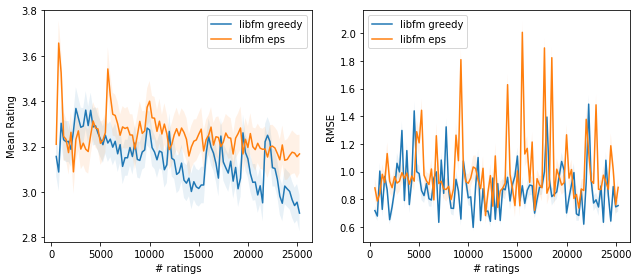

In [52]:
plot_ratings_mses(ratings[0], preds[0], env_params['num_init_ratings'], ['libfm greedy', 'libfm eps', 'itemKnn greedy', 'itemKnn eps'])

In [54]:
params = {'latent_dim': 8, 'affinity_change': 0.1, 'memory_length': 5, 
          'boredom_threshold': 0.5, 'boredom_penalty': 1.0}
env = LatentFactorBehavior(**params, **env_params)

datafilename = 'boredom_and_interest_'+env.name+'.npz'
ratings, preds = run_env_experiment([env], recommenders, exp_params['n_trials'], exp_params['len_trial'], 
                                    expdirname, datafilename, overwrite=True)

Saving to data/dynamic_user_static_rec/boredom_and_interest_latent.npz


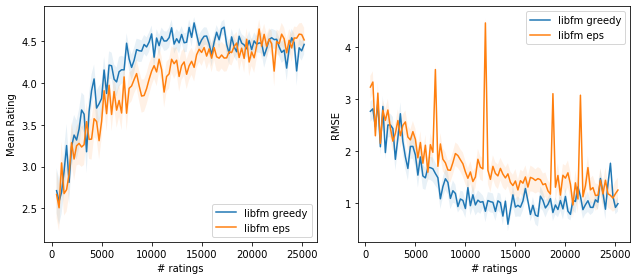

In [55]:
plot_ratings_mses(ratings[0], preds[0], env_params['num_init_ratings'], ['libfm greedy', 'libfm eps', 'itemKnn greedy', 'itemKnn eps'])